In [55]:
import pandas as pd
import numpy as np

from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
 
from nltk.cluster import KMeansClusterer
import nltk
 
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [11]:
def kmeans(n_clusters, text):
    kmean = KMeans(n_clusters=n_clusters, algorithm = 'auto') #max_iter=600
    fitted = kmean.fit(text)
    prediction = kmean.predict(text)
    return prediction

In [12]:
def compute_PCA(text):
    pca = PCA(n_components = 2)
    Y = pca.fit_transform(text)
    return Y

In [13]:
def plot_PCA(Y, prediction):
    plt.figure(figsize=(15,10))
    plt.scatter(Y[:, 0], Y[:, 1], c=prediction, s=50, cmap='viridis')
    plt.title('PCA')
#     plt.savefig('K_Means/PCA_after_kmeans.png', bbox_inches = "tight")

In [16]:
def KMeans_all(text, n_clusters):
#     data = tfidf(text)
    prediction = kmeans(n_clusters,text)
    Y = compute_PCA(text)
    return Y, prediction

#### Testdaten

In [49]:
# training data
 
sentences = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['this', 'is', 'the', 'new', 'post'],
          ['this', 'is', 'about', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'last', 'post']]

# training model
# model = Word2Vec(sentences, min_count=1)
# get vector data
# X = model[model.wv.vocab]
# word_vectors = model.wv.syn0

/home/teresa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/home/teresa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).


In [53]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sentences)]

model = Doc2Vec(documents, min_count=1)

# dX = model[dmodel.wv.vocab]
# dword_vectors = model.wv.syn0

#inference hyper-parameters
start_alpha=0.01
infer_epoch=1000

X=[]
for d in sentences:
    X.append(model.infer_vector(d, alpha=start_alpha, steps=infer_epoch))

/home/teresa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


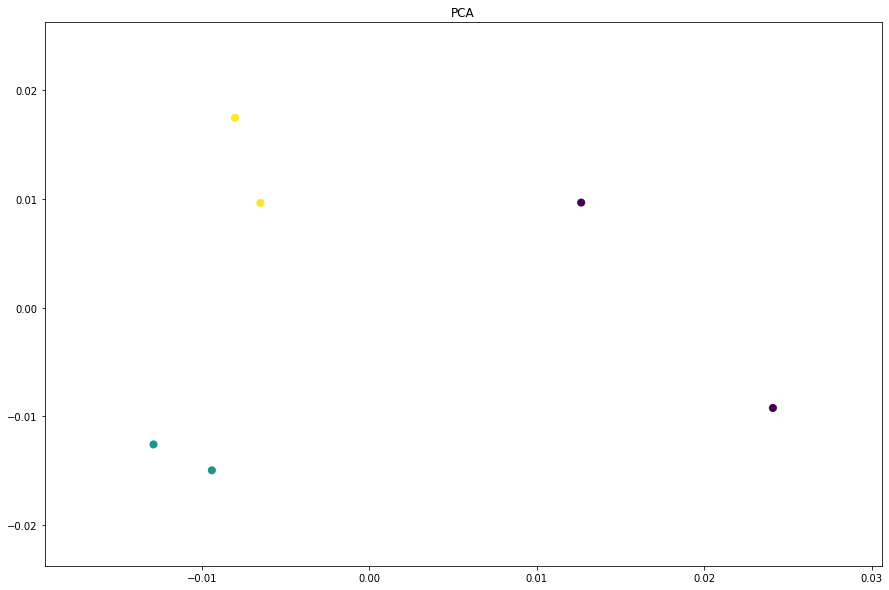

In [54]:
Y, prediction = KMeans_all(X, 3)
plot_PCA(Y, prediction)

#### unsere Daten

In [56]:
songs = pd.read_csv('songs_longtexts.csv')
songs.head()

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,date,decades
0,0,"Andante, Andante",ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,take it easi with me pleas touch me gentli li...,easy slow andante soft light andante strong st...,"['VB', 'PRP', 'JJ', 'IN', 'PRP', '_SP', 'UH', ...",Pop,Rock,europop,swedish pop,260.0,87.0,1980,1980s
1,1,As Good As New,ABBA,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to ...,i 'll never know whi i had to go whi i had to...,lousy rotten tough enough good new good new ne...,"['PRP', 'MD', 'RB', 'VB', 'WRB', 'PRP', 'VBD',...",Pop,Rock,europop,swedish pop,312.0,120.0,1979,1970s
2,3,Cassandra,ABBA,/a/abba/cassandra_20002811.html,down in the street they're all singing and sho...,down in the street they 're all sing and shou...,alive dead hollow smart sorry last sorry final...,"['IN', 'IN', 'DT', 'NN', 'PRP', 'VBP', 'DT', '...",Pop,Rock,europop,swedish pop,361.0,157.0,1981,1980s
3,4,Chiquitita,ABBA,/a/abba/chiquitita_20002978.html,chiquitita tell me what's wrong you're encha...,chiquitita tell me what 's wrong you 're ench...,wrong own sad quiet sure new new hard sad quie...,"['NNP', '_SP', 'VB', 'PRP', 'WP', 'VBZ', 'JJ',...",Pop,Rock,europop,swedish pop,304.0,119.0,1979,1970s
4,5,Crazy World,ABBA,/a/abba/crazy+world_20003013.html,i was out with the morning sun couldn't sleep...,i wa out with the morn sun could n't sleep so...,front crazy stunned crazy other stupid blind l...,"['PRP', 'VBD', 'RB', 'IN', 'DT', 'NN', 'NN', '...",Pop,Rock,europop,swedish pop,304.0,143.0,1975,1970s


In [136]:
reggae = songs[songs.Genre1=='Reggae']
abba = songs[songs.artist=='ABBA']
band = songs[(songs.artist=='System Of A Down')|(songs.artist=='Justin Timberlake')]
somegenres = songs[(songs.Genre1!='Pop') | (songs.Genre1!='Rock')]
somegenres = somegenres[(somegenres.Genre2!=' Pop') & (somegenres.Genre2!=' Rock')]
eighties = somegenres[somegenres.decades=='1980s']

In [145]:
sentences = []
for row in band.POS:
    sentences.append(row.split())

In [146]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sentences)]

model = Doc2Vec(documents, min_count=1)

#inference hyper-parameters
start_alpha=0.01
infer_epoch=1000

X=[]
for d in sentences:
    X.append(model.infer_vector(d, alpha=start_alpha, steps=infer_epoch))

In [147]:
len(documents)

56

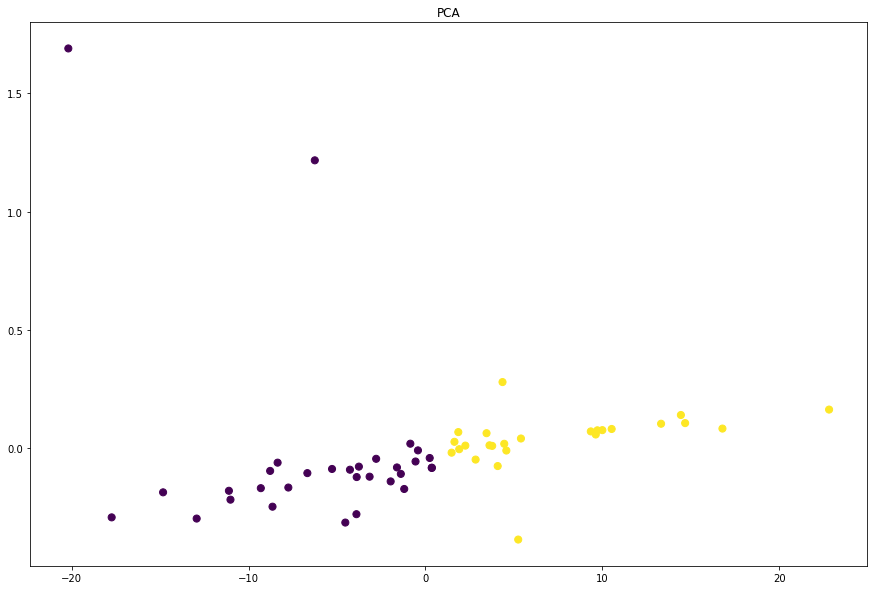

In [148]:
Y, prediction = KMeans_all(X, 2)
plot_PCA(Y, prediction)